## Paketleri Yükleme

In [83]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd

## Veri Setini Yükleme

In [84]:
dataset = pd.read_csv('Turkey_Mobil_Data_Usage_Plain_Data_V2_After_Converting_Categorical_Data.csv')
dataset.set_index('ID', inplace=True)
dataset.head()

,Gender,Age,Marital Status,Job,Employment Status,Your Phone Model,Your bank information,How many years you are using internet banking application,How many years you are using mobile banking application,Do you find mobile application user-friendly,...,New account opening,Request status,Foreign exchange calculation,Loan calculation,Make an appointment at a bank branch,Donate transactions,View payment schedule,View bank campaigns,Mobile signature use,Communicating with the bank
ID,,,,,,,,,,,,,,,,,,,,,
1.0,Man,36-40,Married,NaN,Private sector,SONY,Garanti,15+,7,Yes,...,0,0,0,0,0,0,0,0.0,NaN,0.0
2.0,Woman,31-35,Married,purchasing,Private sector,SAMSUNG A5,Akbank,10+,7,Yes,...,0,0,0,0,0,0,0,0.0,0.0,0.0
3.0,Woman,20-24,Single,trainer,Private sector,Iphone,Garanti,0-5,5,No,...,9,9,0,0,0,0,9,9.0,0.0,0.0
4.0,Woman,20-24,Single,trainer,Private sector,Iphone,Ziraat,0-5,5,No,...,9,9,0,0,0,0,9,9.0,0.0,0.0
5.0,Woman,20-24,Single,trainer,Private sector,Iphone,Isbank,0-5,5,No,...,9,9,0,0,0,0,9,9.0,0.0,0.0


## Veriyi Düzenleme

In [85]:
# No cevabı için tek tip bir yazım sağlanması
dataset.loc[dataset['Do you find mobile application user-friendly'] == "NO", 'Do you find mobile application user-friendly'] = "No"

In [86]:
# Bazı verilerdeki hatalara yol açan boşluklar kaldırılır.
dataset.loc[dataset['Your bank information'] == "Ziraat ", 'Your bank information'] = "Ziraat"
dataset.loc[dataset['Your bank information'] == "Garanti ", 'Your bank information'] = "Garanti"

In [87]:
# NaN kastedilerek yazılan '-' karakteri yerine NaN yazılır.
dataset.replace({'-': np.NaN}, inplace=True)

In [88]:
# Target sütunumuz dataframe'deki sütunların en sonuna gönderilir.
cols = [col for col in dataset if col != 'Do you find mobile application user-friendly'] + ['Do you find mobile application user-friendly']
dataset = dataset[cols]
dataset.head()

,Gender,Age,Marital Status,Job,Employment Status,Your Phone Model,Your bank information,How many years you are using internet banking application,How many years you are using mobile banking application,Internet banking usage frequency,...,Request status,Foreign exchange calculation,Loan calculation,Make an appointment at a bank branch,Donate transactions,View payment schedule,View bank campaigns,Mobile signature use,Communicating with the bank,Do you find mobile application user-friendly
ID,,,,,,,,,,,,,,,,,,,,,
1.0,Man,36-40,Married,NaN,Private sector,SONY,Garanti,15+,7,9.0,...,0,0,0,0,0,0,0.0,NaN,0.0,Yes
2.0,Woman,31-35,Married,purchasing,Private sector,SAMSUNG A5,Akbank,10+,7,5.0,...,0,0,0,0,0,0,0.0,0.0,0.0,Yes
3.0,Woman,20-24,Single,trainer,Private sector,Iphone,Garanti,0-5,5,7.0,...,9,0,0,0,0,9,9.0,0.0,0.0,No
4.0,Woman,20-24,Single,trainer,Private sector,Iphone,Ziraat,0-5,5,7.0,...,9,0,0,0,0,9,9.0,0.0,0.0,No
5.0,Woman,20-24,Single,trainer,Private sector,Iphone,Isbank,0-5,5,7.0,...,9,0,0,0,0,9,9.0,0.0,0.0,No


## Veriyi Temizleme

In [89]:
# Veriyi temizleme kapsamında 'Your bank information' sütununda 0'ın yer aldığı satırlar silinir. Çünkü 0 ile NaN kastedilmektedir.
dataset=dataset.drop(dataset[dataset['Your bank information'] == '0'].index)  

In [90]:
dataset=dataset.dropna(axis=1, how='all')  # NaN değeri bulunan veriler silinir.
dataset=dataset.dropna(axis=0, how='any')

## Veri Setini Öznitelik ve Hedef Olarak Ayırma

In [91]:
dataset2 = dataset.iloc[:,9:58]   # Analizde kullanılacak veriler ayrı bir dataset e alınır.
X = dataset2.iloc[:, :-1].values  # X matrisi ile y vektörü oluşturulur.
y = dataset2.iloc[:, -1].values

## Veri Setinin Görselleştirilmesi

### Veri Setinde Bilgileri Yer Alan Kullanıcıların Cinsiyet Dağılımı

Man      62
Woman    38
Name: Gender, dtype: int64


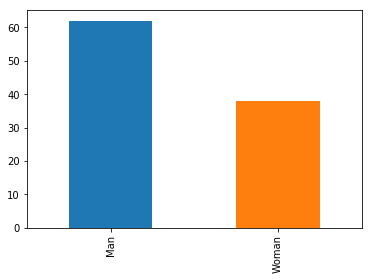

In [92]:
dataset["Gender"].value_counts().plot(kind="bar")
print(dataset["Gender"].value_counts())

### Kullanıcıların Tercih Ettiği Bankalar 

Garanti       23
Ziraat        20
Akbank        14
Yapi Kredi    13
Isbank        10
Finansbank     5
Vakifbank      4
EnPara         3
Denizbank      3
Halk Bank      2
KuveytTurk     1
ING            1
Burganbank     1
Name: Your bank information, dtype: int64


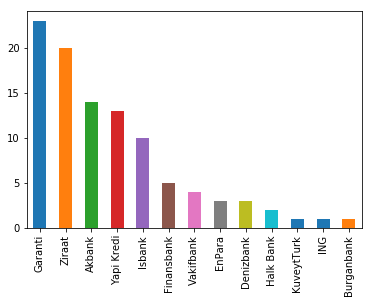

In [93]:
dataset["Your bank information"].value_counts().plot(kind="bar")
print(dataset["Your bank information"].value_counts())

### Kullanıcıların Yaş Dağılımı

25-30    47
20-24    26
36-40    10
31-35     9
41-45     3
45-50     3
50+       2
Name: Age, dtype: int64


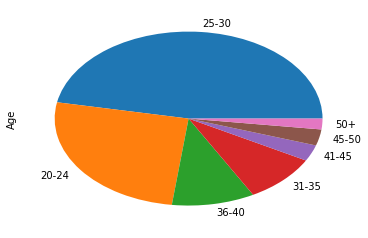

In [94]:
dataset.Age.value_counts().plot(kind ='pie')
print(dataset.Age.value_counts())

### Kullanıcıların Mobil Uygulamayı Kullanıcı Dostu Bulup Bulmama Sorusuna Verdiği Cevaplar

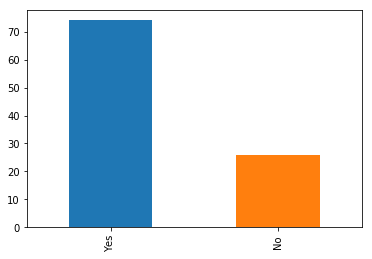

In [95]:
dataset2['Do you find mobile application user-friendly'].value_counts().plot(kind="bar")

### Kullanıcıların Mobil Uygulamayı Kullanıcı Dostu Bulup Bulmamalarına Göre Mobil Bankacılık Kullanım Sıklığı Ortalamaları 

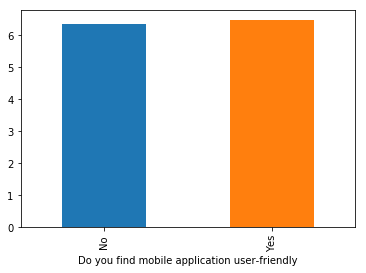

In [96]:
dataset2.groupby('Do you find mobile application user-friendly')['Mobile banking usage frequency'].mean().plot(kind='bar')

### İnternet Bankacılığı ve Mobil Bankacılık Kullanım Sıklığı Yoğunluk Grafiği

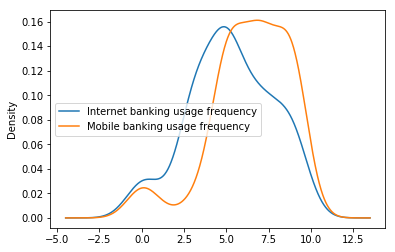

In [97]:
density=dataset2.drop(dataset2.columns[2:49:1],axis=1)
density.plot.density()

### Mobil Uygulamayı Kullanıcı Dostu Bulanların ve Bulmayanların Uygulamayı Kullanma Yoğunlukları 

(array([1., 0., 0., 1., 0., 9., 2., 5., 2., 6.]),
 array([0. , 0.9, 1.8, 2.7, 3.6, 4.5, 5.4, 6.3, 7.2, 8.1, 9. ]),
 <a list of 10 Patch objects>)

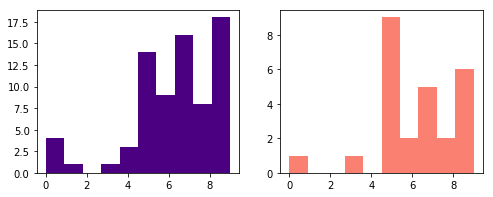

In [98]:
df=dataset2.drop(dataset2.columns[2:48:1], axis=1)
df=df.drop(df.columns[0], axis=1)
userFriendly=df[df['Do you find mobile application user-friendly']=="Yes"]
notUserFriendly=df[df['Do you find mobile application user-friendly']=="No"]
fig = plt.figure(figsize=(8,3))
p1 = fig.add_subplot(1,2,1)
plt.hist(userFriendly["Mobile banking usage frequency"] ,bins=10, color="indigo")
p2 = fig.add_subplot(1,2,2)
plt.hist(notUserFriendly["Mobile banking usage frequency"] ,bins=10, color="salmon")

### Kullanıcıların Tercih Ettiği Bankalara Göre Mobil Bankacılık Uygulamasını Ne Kadar Kullanıcı Dostu Bulduğuna Dair Daire Grafiği

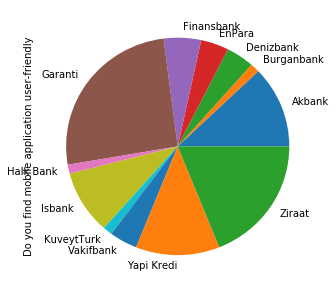

In [99]:
label = {'Yes': 1, 'No': 0}
df=dataset.applymap(lambda s: label.get(s) if s in label else s)
fig = plt.figure(figsize=(5,5))
p1 = fig.add_subplot(1,1,1)
df.groupby('Your bank information')['Do you find mobile application user-friendly'].sum().plot(kind='pie')
plt.show()

## Veri Setinin Analizi

### Modeli Eğitme & Performans Metriklerini Uygulama

In [100]:
from sklearn.model_selection import KFold
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix,classification_report
from sklearn.metrics import precision_recall_fscore_support
from sklearn.tree import export_graphviz

In [101]:
kf = KFold(n_splits=10)  # Veri seti her seferinde 9'u train, 1'i test için olmak üzere 10 parçaya bölünür.
KFold(n_splits=10, random_state=None, shuffle=False)
# Veri setinin dengesiz olma durumunu düzeltmek için class_weight parametresi eklenir.
clf_tree=DecisionTreeClassifier(class_weight="balanced")  

#### 10 kat çapraz doğrulama yöntemi kullanılarak ulaşılan, her bir kat için ayrı  Precision, Recall, F1-Score ve Support değerlerinin hesaplanması

In [102]:
score_array =[] 
k=1
for train_index, test_index in kf.split(X):
    print(k, ". fold")
    k+=1
    X_train, X_test = X[train_index], X[test_index]
    y_train, y_test = y[train_index], y[test_index]
    clf=clf_tree.fit(X_train,y_train)
    y_pred = clf.predict(X_test)
    print(classification_report(y_test,clf_tree.predict(X_test)))
    # Her bir katta bulunan değerler daha sonra ortalama hesaplamak üzere score_array'e eklenir.
    score_array.append(precision_recall_fscore_support(y_test, y_pred, average=None))
    print("y_test: ", y_test)
    print("y_pred: ", y_pred)
    print("\n---------------------------------------------------------------------------------\n")
# Her bir katta bulunan Precision, Recall, F1-Score ve Support değerlerinin ortalaması alınarak sistemin genel durumu tespit edilir.
avg_score = np.mean(score_array, axis=0) 
print("Avg score: \n")
print("Avg precision (No-Yes): {0:.2f} - {1:.2f}".format(avg_score[0][0], avg_score[0][1]))
print("Avg recall (No-Yes): {0:.2f} - {1:.2f}".format(avg_score[1][0], avg_score[1][1]))
print("Avg f1-score (No-Yes): {0:.2f} - {1:.2f}".format(avg_score[2][0], avg_score[2][1]))
print("Avg support (No-Yes): {0:.2f} - {1:.2f}".format(avg_score[3][0], avg_score[3][1]))

1 . fold
             precision    recall  f1-score   support

         No       0.00      0.00      0.00         3
        Yes       0.62      0.71      0.67         7

avg / total       0.44      0.50      0.47        10

y_test:  ['Yes' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes']
y_pred:  ['No' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'Yes']

---------------------------------------------------------------------------------

2 . fold
             precision    recall  f1-score   support

         No       0.50      0.25      0.33         4
        Yes       0.62      0.83      0.71         6

avg / total       0.57      0.60      0.56        10

y_test:  ['Yes' 'Yes' 'Yes' 'No' 'No' 'No' 'No' 'Yes' 'Yes' 'Yes']
y_pred:  ['Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'Yes' 'No' 'Yes' 'No' 'Yes']

---------------------------------------------------------------------------------

3 . fold
             precision    recall  f1-score   support

         No       0.33      0.33      0.33      

/home/sule/anaconda3/lib/python3.6/site-packages/sklearn/metrics/classification.py:1135: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples.
  'precision', 'predicted', average, warn_for)


### Karar Ağacını Kaydetme

In [103]:
export_graphviz(clf, out_file='tree.dot')

## Sonuçların Görselleştirmesi

#### Her bir kat için ayrı bulunan Precision, Recall, F1-Score ve Support değerlerinin bar chart ile gösterilmesi

   1 . fold


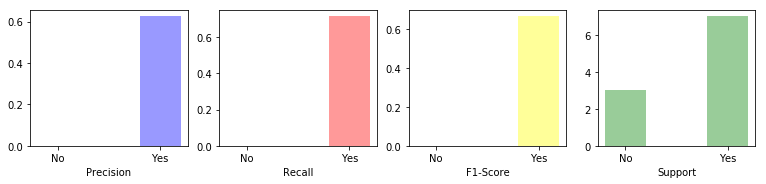

      0.00         0.62        0.00         0.71        0.00          0.67         3            7


   2 . fold


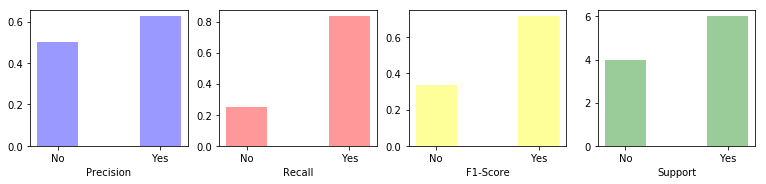

      0.50         0.62        0.25         0.83        0.33          0.71         4            6


   3 . fold


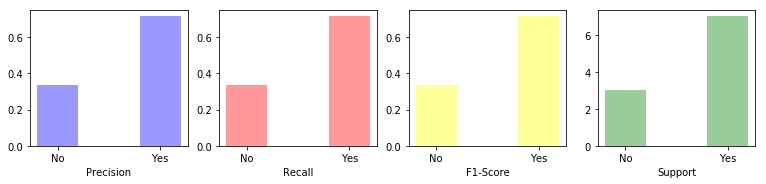

      0.33         0.71        0.33         0.71        0.33          0.71         3            7


   4 . fold


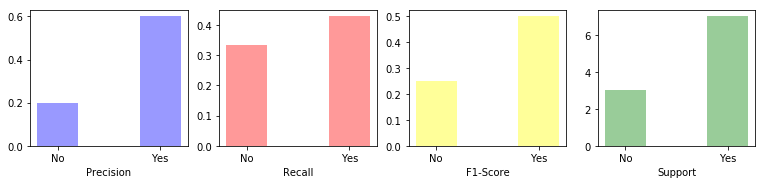

      0.20         0.60        0.33         0.43        0.25          0.50         3            7


   5 . fold


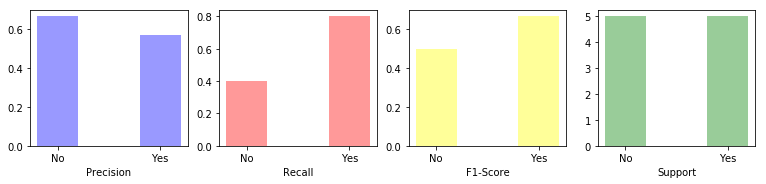

      0.67         0.57        0.40         0.80        0.50          0.67         5            5


   6 . fold


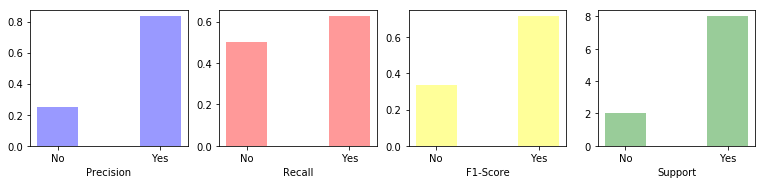

      0.25         0.83        0.50         0.62        0.33          0.71         2            8


   7 . fold


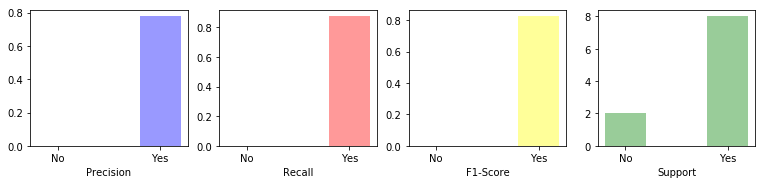

      0.00         0.78        0.00         0.88        0.00          0.82         2            8


   8 . fold


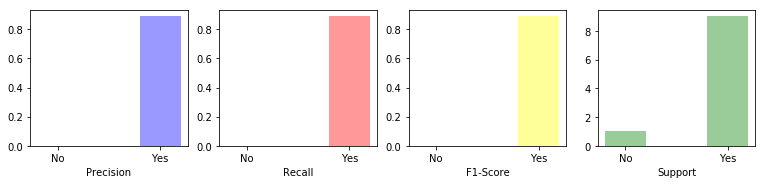

      0.00         0.89        0.00         0.89        0.00          0.89         1            9


   9 . fold


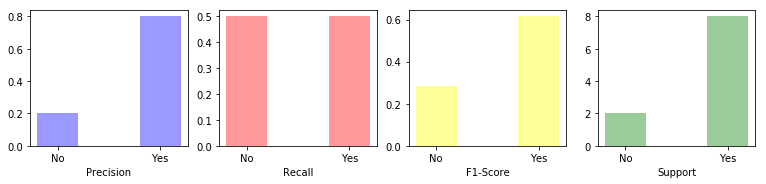

      0.20         0.80        0.50         0.50        0.29          0.62         2            8


   10 . fold


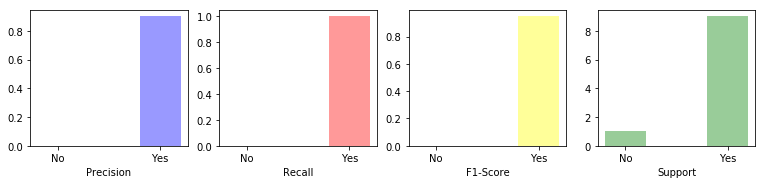

      0.00         0.90        0.00         1.00        0.00          0.95         1            9




In [104]:
noYes=["No","Yes"]
for i in range(len(score_array)):
    print("  ", i+1, ".", "fold")
    fig = plt.figure(figsize=(13,2.5))
    p1 = fig.add_subplot(1,4,1)
    plt.bar(noYes, score_array[i][0], 0.4, alpha=0.4, color="blue")   
    plt.xlabel('Precision')
    p2 = fig.add_subplot(1,4,2)
    plt.bar(noYes, score_array[i][1], 0.4, alpha=0.4, color="red")   
    plt.xlabel('Recall')
    p3 = fig.add_subplot(1,4,3)
    plt.bar(noYes, score_array[i][2], 0.4, alpha=0.4, color="yellow")   
    plt.xlabel('F1-Score')
    p4 = fig.add_subplot(1,4,4)
    plt.bar(noYes, score_array[i][3], 0.4, alpha=0.4, color="green")   
    plt.xlabel('Support')
    plt.show()   
    print("      {0:.2f}         {1:.2f}        {2:.2f}         {3:.2f}        {4:.2f}          {5:.2f}         {6:.0f}            {7:.0f}\n\n".format(score_array[i][0][0], score_array[i][0][1],score_array[i][1][0], score_array[i][1][1], score_array[i][2][0], score_array[i][2][1], score_array[i][3][0], score_array[i][3][1]))

#### Örnek olarak seçilen 10 öznitelik sütunundaki veriye karşılık gelen hedef sütundaki verinin scatter plot ile gösterilmesi

Internet banking usage frequency


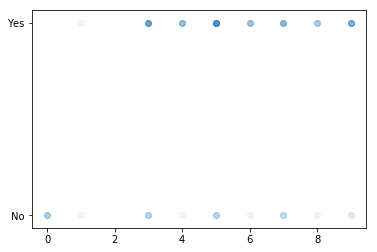



Mobile banking usage frequency


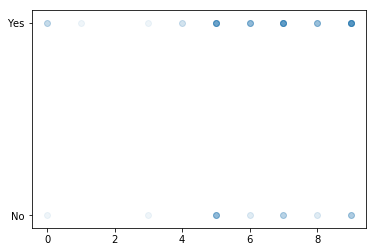



Credit card debt inquiry


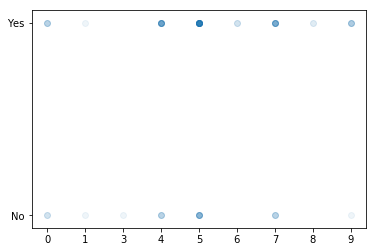



Credit card debt payment


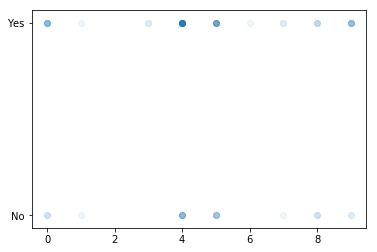



Credit card limit transactions


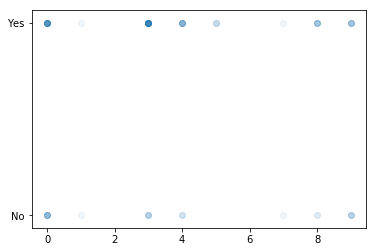



Create & delete virtual card


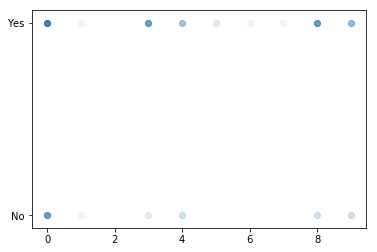



Virtual card limit transactions


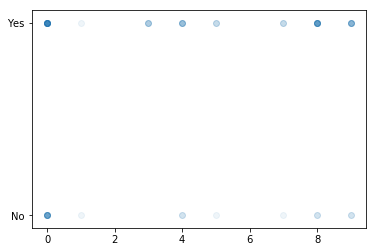



An additional new card application


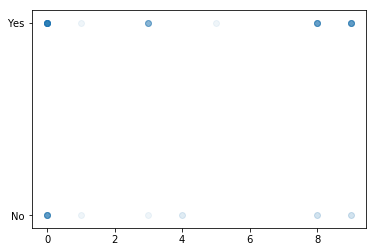



Opening a new account


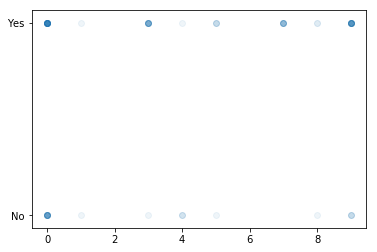



Balance check


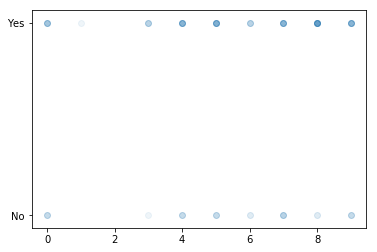

In [105]:
j=0
for i in dataset2.columns:
    if j==10:
        break
    print(i)
    plt.scatter(dataset2[i], dataset2['Do you find mobile application user-friendly'], alpha=0.07)
    plt.show()
    print("\n")
    j+=1